<a href="https://colab.research.google.com/github/Swastik3025/mnist-dataset/blob/main/mnist_digit_classification_using_SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline 
import sklearn 


In [4]:
from sklearn.datasets import load_digits
mnist=load_digits() 
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
dir(mnist)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

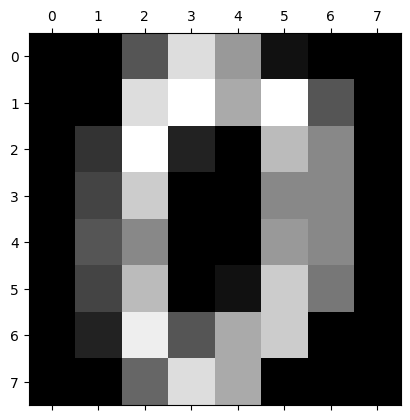

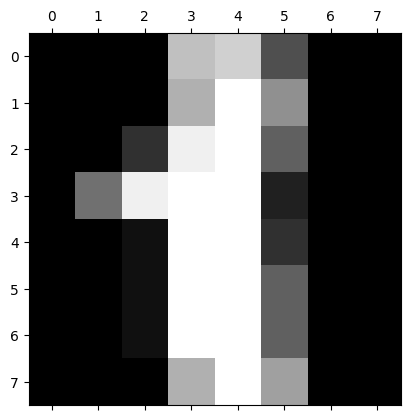

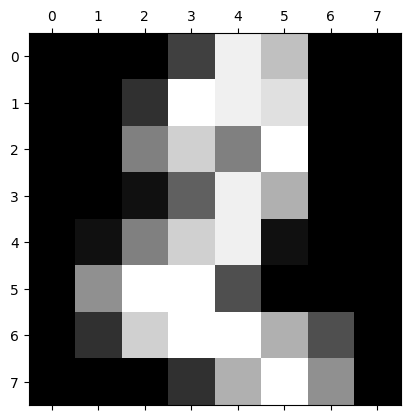

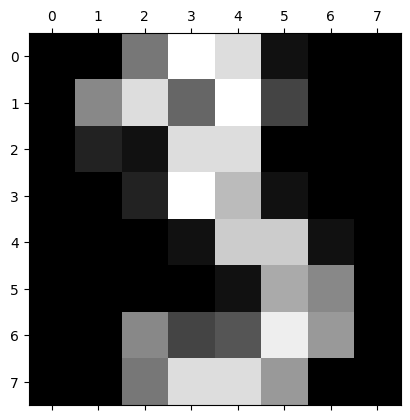

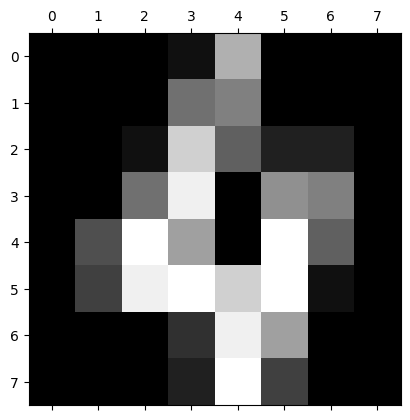

In [6]:
plt.gray() 
for i in range(5): 
  plt.matshow(mnist.images[i])

In [7]:
X,y=mnist["data"],mnist["target"] 
print(X.shape) 
print(y.shape)

(1797, 64)
(1797,)


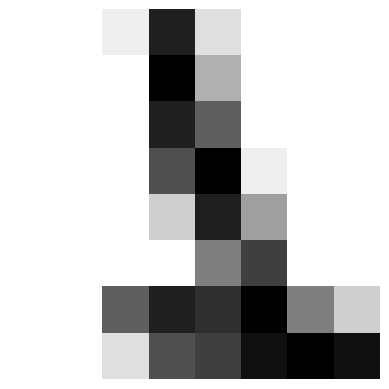

In [8]:
import matplotlib
some_digit=X[1000] 
some_digit_image=some_digit.reshape(8,8) 
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest") 
plt.axis("off")  
plt.show()

In [9]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15) 

In [10]:
X_train.shape

(1527, 64)

In [11]:
shuffle_index=np.random.permutation(1527) 
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [12]:
y_train_1=(y_train==1) 
y_test_1=(y_test==1)

In [13]:
from sklearn.linear_model import SGDClassifier 
sgd_clf=SGDClassifier(random_state=42) 
sgd_clf.fit(X_train,y_train_1)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
sgd_clf=SGDClassifier(random_state=45) 
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=45)

In [16]:
sgd_clf.score(X_test,y_test)

0.9592592592592593

In [17]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone

In [18]:
skfolds=StratifiedKFold(n_splits=3,shuffle=True,random_state=45) 
for train_index,test_index in skfolds.split(X_train,y_train): 
  clone_clf=clone(sgd_clf) 
  X_train_folds=X_train[train_index] 
  y_train_folds=y_train[train_index] 
  X_test_fold=X_train[test_index] 
  y_test_fold=y_train[test_index]  
  clone_clf.fit(X_train_folds,y_train_folds) 
  y_pred=clone_clf.predict(X_test_fold) 
  n_correct=sum(y_pred==y_test_fold) 
  print(n_correct/len(y_pred))

0.9502617801047121
0.918848167539267
0.9424083769633508
0.9658792650918635


In [20]:
from sklearn.model_selection import cross_val_score 
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.93713163, 0.94695481, 0.93909627])

In [21]:
from sklearn.model_selection import cross_val_predict 
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train,cv=3)

In [23]:
from sklearn.metrics import confusion_matrix 
cf=confusion_matrix(y_train,y_train_pred) 
cf

array([[141,   1,   0,   0,   1,   1,   0,   0,   0,   0],
       [  0, 140,   1,   4,   1,   1,   1,   1,   7,   2],
       [  0,   1, 142,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 143,   0,   3,   0,   1,   4,   2],
       [  0,   1,   0,   0, 155,   0,   0,   0,   0,   2],
       [  0,   1,   1,   1,   0, 156,   0,   1,   0,   2],
       [  0,   4,   0,   0,   0,   0, 143,   0,   1,   0],
       [  0,   0,   0,   1,   2,   1,   0, 142,   2,   3],
       [  0,   8,   1,   2,   1,   2,   0,   0, 133,   6],
       [  0,   2,   0,   1,   0,   2,   0,   1,   9, 142]])

Text(70.72222222222221, 0.5, 'Actual')

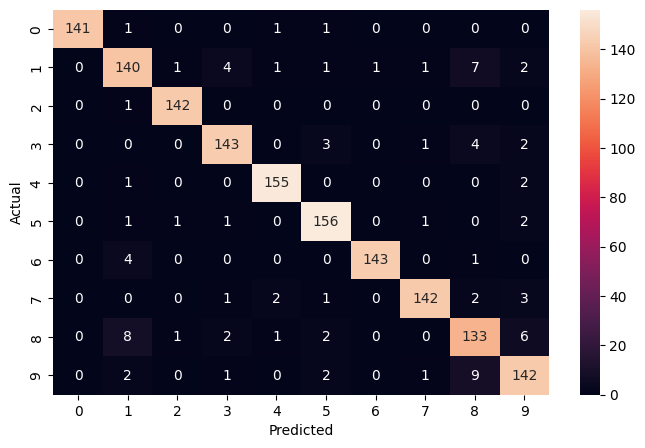

In [27]:
import seaborn as sns 
plt.figure(figsize=(8,5))
sns.heatmap(cf,annot=True,fmt=',d')
plt.xlabel('Predicted') 
plt.ylabel('Actual')